In [ ]:
!git clone https://github.com/soCzech/TransNetV2.git

In [ ]:
%cd TransNetV2

In [ ]:
!python setup.py install

In [ ]:
!pip install ffmpeg-python

In [ ]:
# !python inference/transnetv2.py ./1.mp4 --visualize

In [5]:
from inference.transnetv2 import TransNetV2

model = TransNetV2(model_dir="inference/transnetv2-weights/")
video_frames, single_frame_predictions, all_frame_predictions = model.predict_video("video_15s.mp4")


[TransNetV2] Extracting frames from video_15s.mp4
[TransNetV2] Processing video frames 375/375


In [6]:
res_arr = model.predictions_to_scenes(single_frame_predictions)
res_arr

array([[  0,   5],
       [  6,  17],
       [ 18,  43],
       [ 44,  69],
       [ 70,  96],
       [ 97, 125],
       [126, 149],
       [150, 203],
       [204, 228],
       [229, 255],
       [256, 281],
       [282, 318],
       [319, 338],
       [340, 373],
       [374, 374]], dtype=int32)

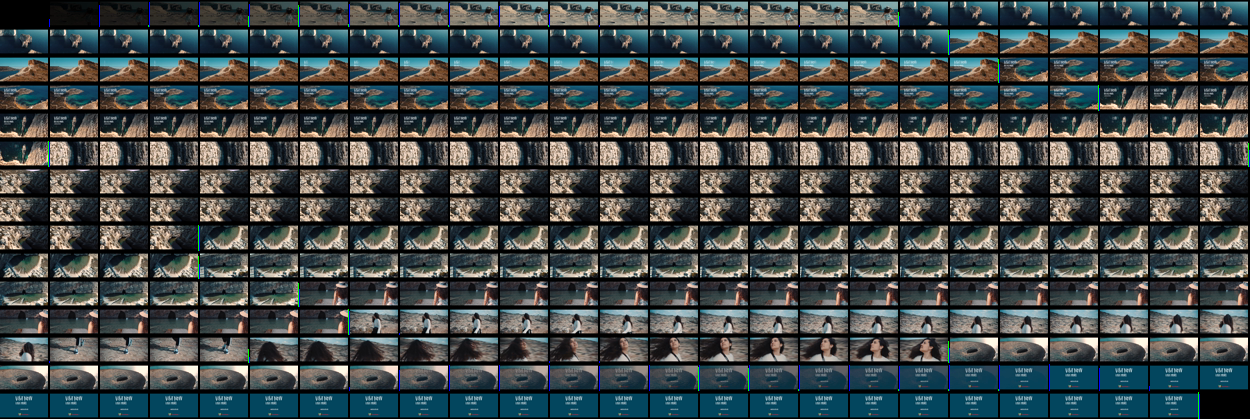

In [ ]:
# model.visualize_predictions(video_frames, predictions=(single_frame_predictions, all_frame_predictions))

In [15]:
import numpy as np

full_list = []
for i in res_arr:
  mid_value = int(i.mean())
  new_element = np.insert(i, 1, mid_value)
  full_list.append(new_element)

full_arr = np.array(full_list)

print(full_arr)


[[  0   2   5]
 [  6  11  17]
 [ 18  30  43]
 [ 44  56  69]
 [ 70  83  96]
 [ 97 111 125]
 [126 137 149]
 [150 176 203]
 [204 216 228]
 [229 242 255]
 [256 268 281]
 [282 300 318]
 [319 328 338]
 [340 356 373]
 [374 374 374]]


In [17]:
import cv2
import os

saved_dir = "custom_keyframes"

video_path = 'video_15s.mp4'

cap = cv2.VideoCapture(video_path)

if not cap.isOpened():
    print("Can't open the video.")
    exit()

if not os.path.exists(saved_dir):
    os.mkdir(saved_dir)

temp_arr = full_arr.flatten()

for i in temp_arr:
  frame_index = i
  cap.set(cv2.CAP_PROP_POS_FRAMES, frame_index)

  ret, frame = cap.read()

  if not ret:
      print("Can't read the frame.")
      exit()

  saved_path = f"{saved_dir}/{frame_index:05d}.jpg"
  cv2.imwrite(saved_path, frame)
  print(f"Save successfully {saved_path}")

cap.release()
cv2.destroyAllWindows()


Save successfully custom_keyframes/00000.jpg
Save successfully custom_keyframes/00002.jpg
Save successfully custom_keyframes/00005.jpg
Save successfully custom_keyframes/00006.jpg
Save successfully custom_keyframes/00011.jpg
Save successfully custom_keyframes/00017.jpg
Save successfully custom_keyframes/00018.jpg
Save successfully custom_keyframes/00030.jpg
Save successfully custom_keyframes/00043.jpg
Save successfully custom_keyframes/00044.jpg
Save successfully custom_keyframes/00056.jpg
Save successfully custom_keyframes/00069.jpg
Save successfully custom_keyframes/00070.jpg
Save successfully custom_keyframes/00083.jpg
Save successfully custom_keyframes/00096.jpg
Save successfully custom_keyframes/00097.jpg
Save successfully custom_keyframes/00111.jpg
Save successfully custom_keyframes/00125.jpg
Save successfully custom_keyframes/00126.jpg
Save successfully custom_keyframes/00137.jpg
Save successfully custom_keyframes/00149.jpg
Save successfully custom_keyframes/00150.jpg
Save succe

In [11]:
!mkdir custom_keyframes

In [16]:
!rm -rf custom_keyframes